https://snap.stanford.edu/biodata/datasets/10018/10018-ChSe-Decagon.html

In [10]:
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dataset_path = "./data/ChSe-Decagon_monopharmacy.csv.gz"

# Read the CSV file with pandas first for better handling of the data
df = pd.read_csv(dataset_path, compression='gzip')
df["Individual Side Effect"].unique()

# Create the directed graph from the dataframe
graph = nx.from_pandas_edgelist(df, '# STITCH', 'Individual Side Effect', ['Side Effect Name'], create_using=nx.DiGraph)

# Display basic graph statistics
print(f"Number of nodes: {graph.number_of_nodes()}")
print(f"Number of edges: {graph.number_of_edges()}")

Number of nodes: 10823
Number of edges: 174977


80% des nœuds ont un degré <= 33
Degré minimum : 1
Degré maximum : 1550
Degré moyen : 32.33


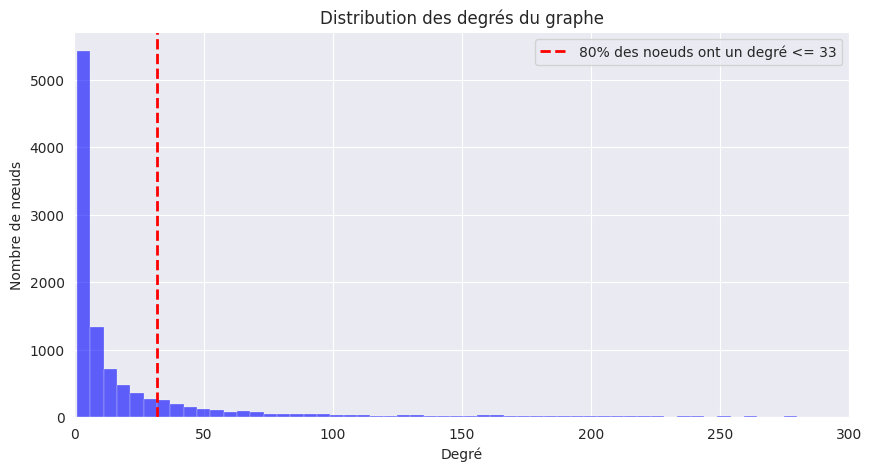

In [13]:
# Calculer les degrés de chaque nœud
degrees = [deg for _, deg in graph.degree()]

# Calcul de 80% des valeurs
degrees = np.array(degrees)
degrees_sorted = np.sort(degrees)
unique_degree, count_degree = np.unique(degrees_sorted, return_counts=True)
cumulative_percentage = np.cumsum(count_degree) / len(degrees)
idx_80 = np.argmax(cumulative_percentage >= 0.8)
print(f"80% des nœuds ont un degré <= {unique_degree[idx_80]}")

# Afficher quelques statistiques
print(f"Degré minimum : {min(degrees)}")
print(f"Degré maximum : {max(degrees)}")
print(f"Degré moyen : {np.mean(degrees):.2f}")

# Version seaborn
plt.figure(figsize=(10, 5))
sns.set_style("darkgrid")
sns.histplot(degrees, bins=300, color='blue', log_scale=False, alpha=0.6)
plt.axvline(x=idx_80, color='red', linestyle='--', linewidth=2, label = f"80% des noeuds ont un degré <= {unique_degree[idx_80]}")
plt.xlim(0, 300)
plt.xlabel("Degré")
plt.ylabel("Nombre de nœuds")
plt.title("Distribution des degrés du graphe")
plt.legend()
plt.show()

-------------------
De par la construction du graph, beaucoup de noeuds ont un degré très faible puisque le graph relie environs 640 médicaments à leur effets secondaires associés. on s'attend donc à ce que la plupart des noeuds aient un degré très faible, ce qui est le cas.

-------------------

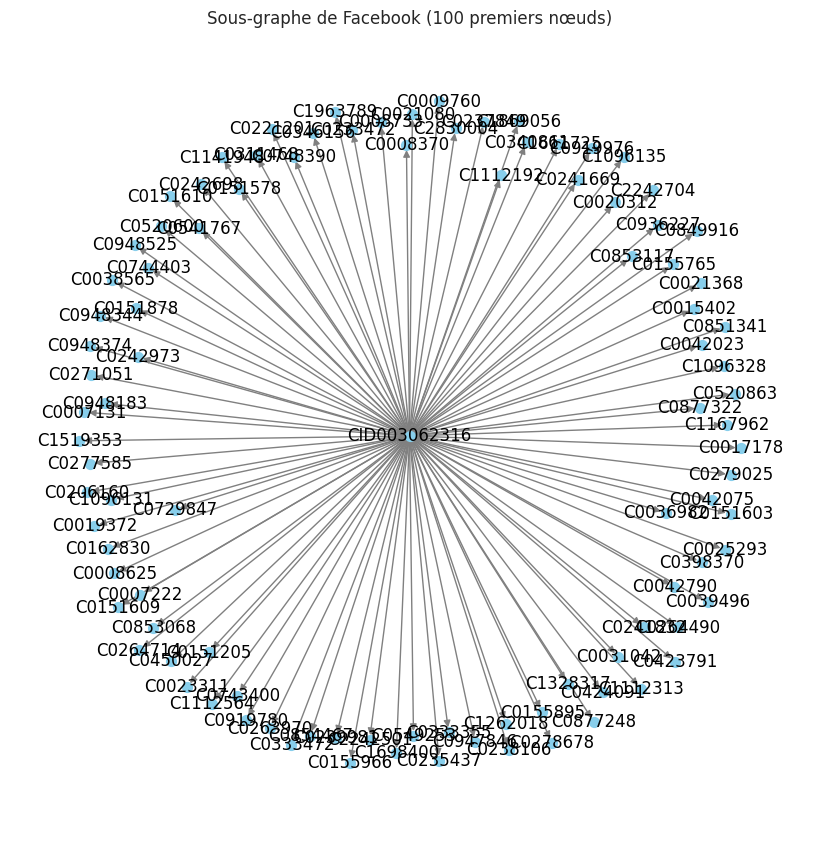

In [16]:
# Extraire un sous-graphe (par exemple les 100 premiers nœuds)
nodes_sample = list(graph.nodes)[:100]
H = graph.subgraph(nodes_sample)

# Visualiser ce sous-graphe
plt.figure(figsize=(8, 8))
nx.draw(H, with_labels=True, node_size=50, node_color='skyblue', edge_color='gray')
plt.title("Sous-graphe de Facebook (100 premiers nœuds)")
plt.show()

-----------------
On retrouve ce qui est expliqué ci dessus: un noeud "drug" au milieu relié directement à beaucoup d'effets secondaires.

-----------------

## Centrality

### degree centrality

In [17]:
degree_centrality = nx.degree_centrality(graph)

# Afficher les 5 nœuds les plus centraux
top_nodes = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:5]
print("Top 5 nœuds par centralité en degré :")
for node, centrality in top_nodes:
    print(f"Nœud {node} -> Centralité : {centrality:.4f}")

Top 5 nœuds par centralité en degré :
Nœud CID000068740 -> Centralité : 0.1432
Nœud CID000004674 -> Centralité : 0.1400
Nœud CID000005538 -> Centralité : 0.1136
Nœud CID000000444 -> Centralité : 0.1096
Nœud CID000005064 -> Centralité : 0.0966


---------------
Comme prévus, on ne retrouve que des noeuds "médicaments" dans les noeuds centraux.

---------------

In [18]:
betweenness_centrality = nx.betweenness_centrality(graph)

# Afficher les 5 nœuds les plus centraux
top_nodes = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:5]
print("Top 5 nœuds par intermédiarité :")
for node, centrality in top_nodes:
    print(f"Nœud {node} -> Centralité : {centrality:.4f}")

KeyboardInterrupt: 